In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

In [5]:
data = pd.read_csv("melb_data.csv")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [11]:
X = data[['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']]
y = data.Price

model = DecisionTreeRegressor(random_state=1)
model.fit(X, y)

model.predict(X.head())

array([1480000., 1035000., 1465000.,  850000., 1600000.])

Varying the Number of Features
==

In [26]:
import matplotlib.pyplot as plt

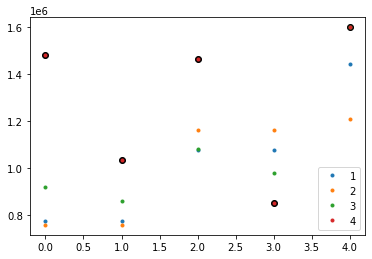

In [37]:
def use(keys):
    
    X = data[keys]
    y = data.Price

    model = DecisionTreeRegressor(random_state=1)
    model.fit(X, y)

    return model.predict(X.head())

Y = data.Price.head()
X = list(range(len(Y)))
plt.plot(X, Y, "ok")

previous = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
for i in range(1, len(previous)):
    
    keys = previous[0:i]
    y = use(keys)
    plt.plot(y, ".", label=str(i))
    
plt.legend()

In [29]:
from sklearn.metrics import mean_absolute_error

X = data[['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']]
y = data.Price

model = DecisionTreeRegressor(random_state=1)
model.fit(X, y)

prediction = model.predict(X.head())

mean_absolute_error(y.head(), prediction)

0.0

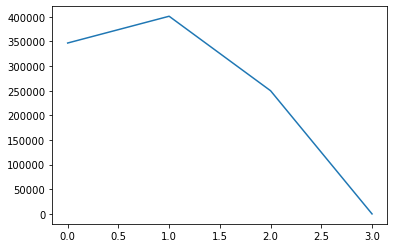

In [71]:
def get_model(keys):
    
    X = data[keys]
    y = data.Price

    model = DecisionTreeRegressor(random_state=1)
    model.fit(X, y)
    return model


previous = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

errors = []
for i in range(1, len(previous)):
    
    keys = previous[0:i]
    
    X = data[keys].head()
    
    model = get_model(keys)
    y = model.predict(X)
    
    errors.append(mean_absolute_error(data.Price.head(), y))
    
plt.plot(errors)

Comparing Training Predictions to Actual Predictions
==
Still varying number of features

In [39]:
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.metrics import mean_absolute_error

X = data[['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']]
y = data.Price

# (X, y) is for training, (X2, y2) is for validation
X, X2, y, y2 = train_test_split(X, y, random_state=0)

model = DecisionTreeRegressor(random_state=1)
model.fit(X, y)

prediction = model.predict(X2)

mean_absolute_error(y2, prediction)

250429.6127638684

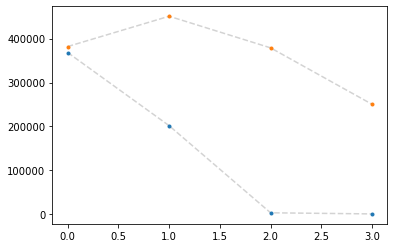

In [86]:
def get_error(keys):
    
    X = data[keys]
    y = data.Price

    X, X2, y, y2 = train_test_split(X, y, random_state=0)
    model = DecisionTreeRegressor(random_state=1)
    model.fit(X, y)
    
    prediction = model.predict(X)
    fit = mean_absolute_error(y, prediction)
    
    prediction2 = model.predict(X2)
    error = mean_absolute_error(y2, prediction2)
    
    return fit, error


#options = ['Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Bedroom2', 'Bathroom', 'Car',
#       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea','Regionname']

options = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

errors = []
fits = []
for i in range(1, len(options)):
    
    keys = options[0:i+1]
    fit, error = get_error(keys)
    
    fits.append(fit)
    errors.append(error)
    
plt.plot(errors, "--", color="lightgrey")
plt.plot(fits, "--", color="lightgrey")
plt.plot(fits, ".")
plt.plot(errors, ".")

Comparing Training Predictions to Actual Predictions II
==
Varying tree depth

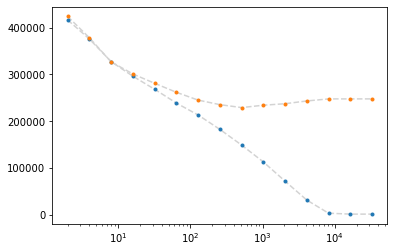

In [90]:
keys = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

X = data[keys]
y = data.Price

X, X2, y, y2 = train_test_split(X, y, random_state=0)

def get_error(limit):
    
    model = DecisionTreeRegressor(max_leaf_nodes = limit, random_state=1)
    model.fit(X, y)
    
    prediction = model.predict(X)
    fit = mean_absolute_error(y, prediction)
    
    prediction2 = model.predict(X2)
    error = mean_absolute_error(y2, prediction2)
    
    return fit, error

limits = []
errors = []
fits = []

for i in range(1, 16):
    
    limit = 2**i
    fit, error = get_error(limit)
    
    limits.append(limit)
    fits.append(fit)
    errors.append(error)

plt.semilogx(limits, errors, "--", color="lightgrey")
plt.semilogx(limits, fits, "--", color="lightgrey")
plt.semilogx(limits, fits, ".")
plt.semilogx(limits, errors, ".")

Random Forests
==

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
keys = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

X = data[keys]
y = data.Price

X, X2, y, y2 = train_test_split(X, y, random_state=0)

model = RandomForestRegressor(random_state = 1)
model.fit(X, y)

fitness = mean_absolute_error(y, model.predict(X))
error = mean_absolute_error(y2, model.predict(X2))

print(fitness, "vs", error)

67555.83327487372 vs 180860.37877504269
